# Understanding Airport Delays 

The goal of this analysis is to understand what factors contribute to delays at airports using clustering techniques

### Load in the data & explore

In [3]:
#load appropriate packages

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
#load in first dataset

airport_cancel_divert = pd.read_csv("/assets/airport_cancellations.csv")

In [4]:
#check length - 74 airports

len(airport_cancel_divert["Airport"].unique())

74

In [5]:
#check length of the entire dataset

len(airport_cancel_divert)

805

In [6]:
#looks like this is across 11 years

len(airport_cancel_divert["Year"].unique())

11

In [7]:
#no missing values

airport_cancel_divert.isnull().sum()

Airport                    0
Year                       0
Departure Cancellations    0
Arrival Cancellations      0
Departure Diversions       0
Arrival Diversions         0
dtype: int64

In [8]:
#OXR and RFD missing

airport_cancel_divert["Airport"].value_counts()

LAS    11
MHT    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
ONT    11
SAT    11
RDU    11
MEM    11
ISP    11
IAH    11
BUR    11
SWF    11
SJC    11
TUS    11
MKE    11
SMF    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
CLE    11
LGA    11
SNA    11
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
DFW    11
IAD    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
OXR     7
RFD     6
Name: Airport, dtype: int64

In [9]:
#Missing 2011 - 2014

airport_cancel_divert[airport_cancel_divert["Airport"] == "OXR"]

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
539,OXR,2004.0,43.0,37.0,0.0,0.0
540,OXR,2005.0,33.0,22.0,0.0,0.0
541,OXR,2006.0,51.0,44.0,2.0,1.0
542,OXR,2007.0,21.0,17.0,1.0,0.0
543,OXR,2008.0,20.0,20.0,1.0,0.0
544,OXR,2009.0,27.0,24.0,0.0,0.0
545,OXR,2010.0,10.0,8.0,0.0,0.0


In [10]:
#Missing 2004

airport_cancel_divert[airport_cancel_divert["Airport"] == "RFD"]

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
634,RFD,2006.0,9.0,11.0,2.0,8.0
635,RFD,2007.0,4.0,7.0,2.0,11.0
636,RFD,2008.0,5.0,2.0,0.0,5.0
637,RFD,2011.0,0.0,0.0,0.0,0.0
638,RFD,2012.0,1.0,1.0,0.0,0.0
639,RFD,2013.0,0.0,0.0,0.0,0.0


airport_cancel_divert sums up each airports year from 2004 - 2014 to sum up all the cancellations and diversions happening 

OXR and RFD are missing values though 

In [12]:
#load in next data_set

airport_cancel_details = pd.read_csv("/assets/Airport_operations.csv")

In [57]:
#missing a few years for PSP and SMF

airport_cancel_details["airport"].value_counts()

LAS    11
BUR    11
VNY    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
GYY    11
SAT    11
RDU    11
MEM    11
ISP    11
TEB    11
MHT    11
SJC    11
SWF    11
MKE    11
ONT    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
BDL    11
DFW    11
IAD    11
OXR    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
RFD    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
PSP     8
SMF     8
Name: airport, dtype: int64

In [13]:
len(airport_cancel_details["airport"].unique())

#includes 3 more airports than the airport_cancel_divert data set

77

In [14]:
#missing 2004 - 2006

airport_cancel_details[airport_cancel_details["airport"] == "PSP"]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
616,PSP,2007,17764,17852,0.7411,0.7053,0.7011,13.53,11.40,3.03,15.56,2.48,1.00,3.52,15.67
617,PSP,2008,16005,16036,0.7683,0.7321,0.7312,12.35,12.16,3.10,14.32,2.82,1.17,3.71,13.87
618,PSP,2009,14802,14837,0.8128,0.7919,0.7853,10.22,11.90,2.32,11.52,2.67,0.68,2.88,10.95
619,PSP,2010,14769,14859,0.7944,0.7699,0.7574,11.54,11.77,2.50,12.97,3.07,0.73,3.12,12.86
620,PSP,2011,14458,14632,0.7738,0.7484,0.7484,12.76,11.89,2.64,14.33,3.35,0.77,3.30,13.57
621,PSP,2012,15601,15682,0.7692,0.7362,0.7587,14.00,12.51,3.14,15.98,3.23,0.84,3.20,12.85
622,PSP,2013,15346,15242,0.7754,0.7483,0.7683,14.15,12.50,2.72,15.76,2.89,0.95,2.91,12.66
623,PSP,2014,16231,16208,0.7632,0.7332,0.7512,14.56,12.67,2.74,16.29,3.19,0.99,3.78,13.81


In [15]:
#missing 2004 - 2006

airport_cancel_details[airport_cancel_details["airport"] == "SMF"]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
756,SMF,2007,65686,65960,0.8025,0.7690,0.7724,11.01,10.86,2.64,12.95,2.54,1.12,2.59,12.17
757,SMF,2008,61470,61500,0.8067,0.7884,0.7706,11.12,10.46,1.93,12.29,2.13,0.73,2.49,12.13
758,SMF,2009,52731,52905,0.8401,0.8281,0.8066,9.02,9.85,1.57,9.75,1.88,0.65,1.75,9.87
759,SMF,2010,51516,51632,0.8209,0.8073,0.7886,9.97,9.64,1.48,10.86,1.93,0.66,1.98,11.10
760,SMF,2011,50574,50719,0.8265,0.7981,0.8055,9.82,10.32,2.19,11.36,1.86,0.83,2.01,10.41
761,SMF,2012,49016,49085,0.8505,0.8285,0.8311,8.97,10.43,2.20,10.40,1.71,1.01,1.69,9.28
762,SMF,2013,46868,47183,0.8242,0.7999,0.8035,9.88,10.58,2.13,11.29,1.87,0.74,1.64,10.47
763,SMF,2014,47618,47523,0.7861,0.7661,0.7659,11.91,10.75,2.04,13.09,2.00,0.85,2.10,12.57


In [16]:
#GYY, TEB, VNY are in here but not the first one

airport_cancel_details["airport"].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'GYY', 'HNL', 'HOU', 'HPN', 'IAD',
       'IAH', 'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB',
       'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY',
       'OAK', 'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL',
       'PHX', 'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT',
       'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL',
       'SWF', 'TEB', 'TPA', 'TUS', 'VNY'], dtype=object)

In [17]:
airport_cancel_divert["Airport"].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'HNL', 'HOU', 'HPN', 'IAD', 'IAH',
       'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB', 'MCI',
       'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK',
       'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL', 'PHX',
       'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT', 'SDF',
       'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'SWF',
       'TPA', 'TUS'], dtype=object)

airport_cancel_details provides way more details around the operations of the airports but also has more airports than the cancel_divert, and still also has missing years for some airports

In [18]:
#load in 3rd dataset

airport_details = pd.read_csv("/assets/airports.csv")

In [19]:
airport_details.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [20]:
#has way more airports than all the other datasets

len(airport_details["LocID"].unique())

5153

airport_details provides more info about actual airports vs the others which are focused around cancel/delay details

To sum it up, here are a few potential issues with the data:

- There is already data missing for some of the csvs as noted above
- assume that "departures for metric for computation" and "arrivals for metric computation" are total arrivals and total departures
- The numerical values in particular are very very similar meaning that there is likely a strong amount of collinearlity between them. they will likely need to be squashed down at one point using PCA or selecting best features. 

### EDA

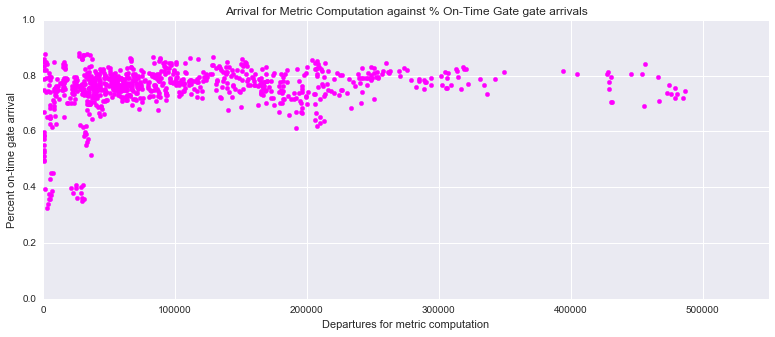

In [142]:
#doesn't seem to be strong correlation between arrivals and delays

plt.figure(figsize=(13,5))
plt.title("Arrival for Metric Computation against % On-Time Gate gate arrivals")
plt.scatter(x=airport_cancel_details["arrivals for metric computation"], y=airport_cancel_details["percent on-time gate arrivals"], color = "magenta")
plt.xlabel("Departures for metric computation")
plt.ylabel("Percent on-time gate arrival")
plt.ylim(0, 1)
plt.xlim(0, 550000)
plt.show()

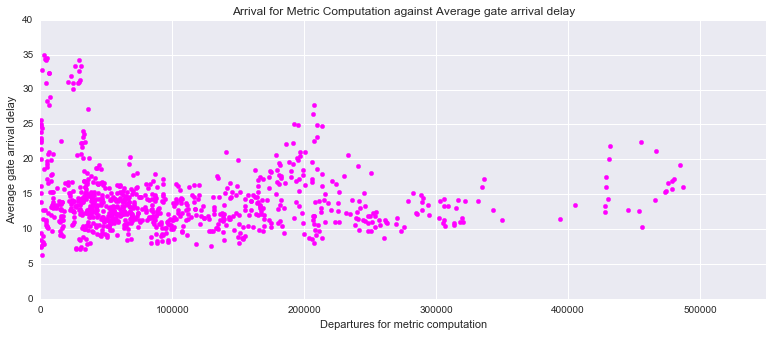

In [143]:
#doesn't seem to be strong correlation between arrivals and delays

plt.figure(figsize=(13,5))
plt.title("Arrival for Metric Computation against Average gate arrival delay")
plt.scatter(x=airport_cancel_details["arrivals for metric computation"], y=airport_cancel_details["average gate arrival delay"], color = "magenta")
plt.xlabel("Departures for metric computation")
plt.ylabel("Average gate arrival delay")
plt.ylim(0, 40)
plt.xlim(0, 550000)
plt.show()

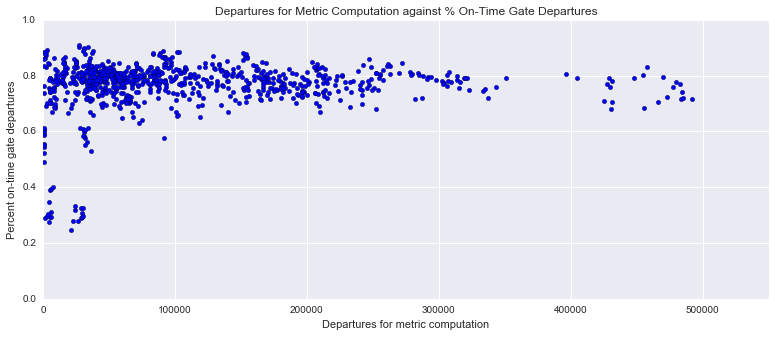

In [144]:
#Nor does it seem to apply for departures

test = airport_cancel_details["departures for metric computation"]
test2 = airport_cancel_details["percent on-time gate departures"]

plt.figure(figsize=(13,5))
plt.title("Departures for Metric Computation against % On-Time Gate Departures")
plt.scatter(x=test, y=test2)
plt.xlabel("Departures for metric computation")
plt.ylabel("Percent on-time gate departures")
plt.ylim(0, 1)
plt.xlim(0, 550000)
plt.show()

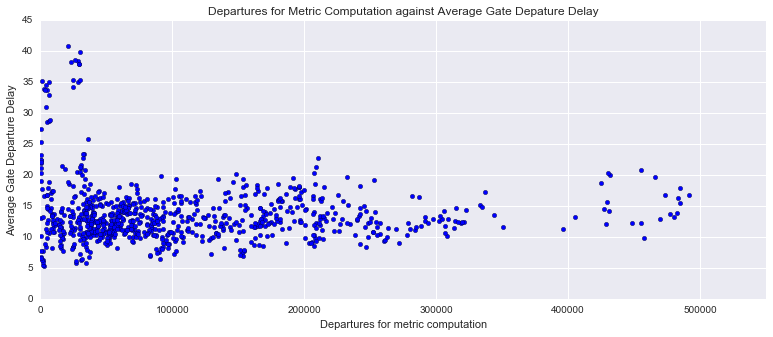

In [145]:
test = airport_cancel_details["departures for metric computation"]

plt.figure(figsize=(13,5))
plt.title("Departures for Metric Computation against Average Gate Depature Delay")
plt.scatter(x=test, y=airport_cancel_details["average_gate_departure_delay"])
plt.xlabel("Departures for metric computation")
plt.ylabel("Average Gate Departure Delay")
plt.ylim(0, 45)
plt.xlim(0, 550000)
plt.show()

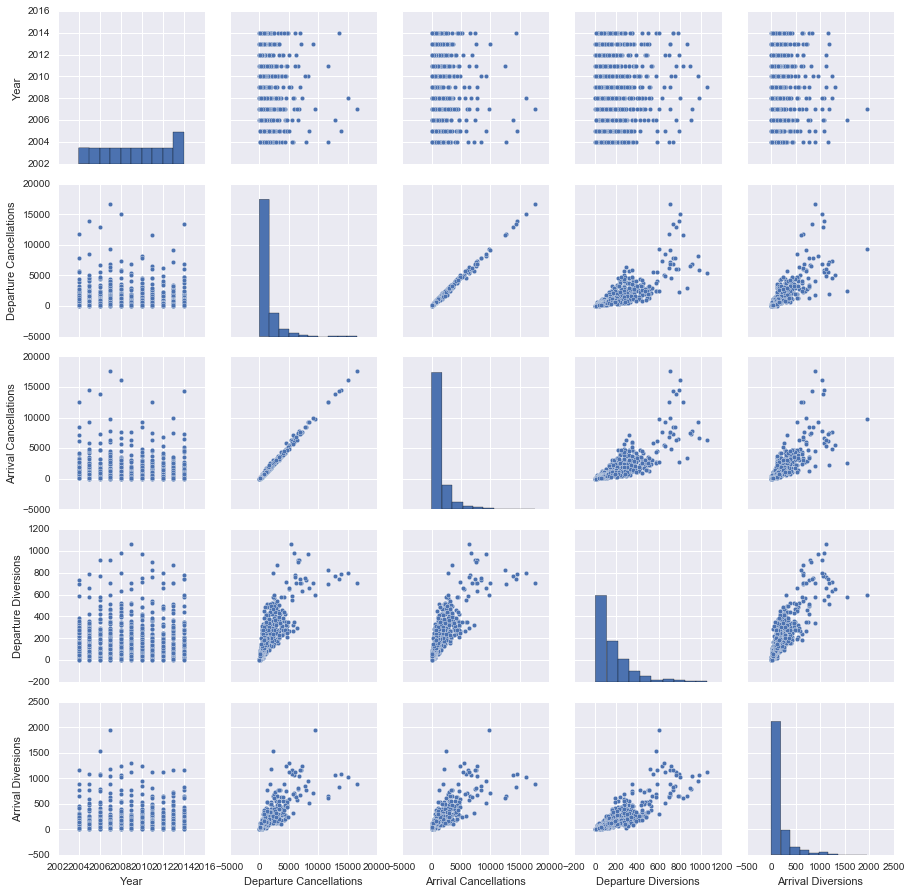

In [152]:
sns.pairplot(airport_cancel_divert)

#arrival and departure cancellations are pretty much the same - probably don't need to include both of them in the eventual analysis
#cancellations and diversions seem like they could be correlated

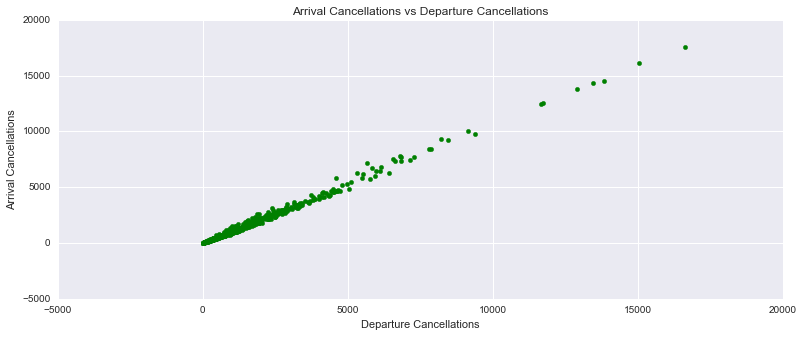

In [164]:
#strong collinearity here which makes sense - if you are cancelling a departure you will probably be cancelling an arrival
plt.figure(figsize=(13,5))
plt.title("Arrival Cancellations vs Departure Cancellations")
plt.scatter(x=airport_cancel_divert["Departure Cancellations"], y = airport_cancel_divert["Arrival Cancellations"], color="green")
plt.xlabel("Departure Cancellations")
plt.ylabel("Arrival Cancellations")
plt.show()

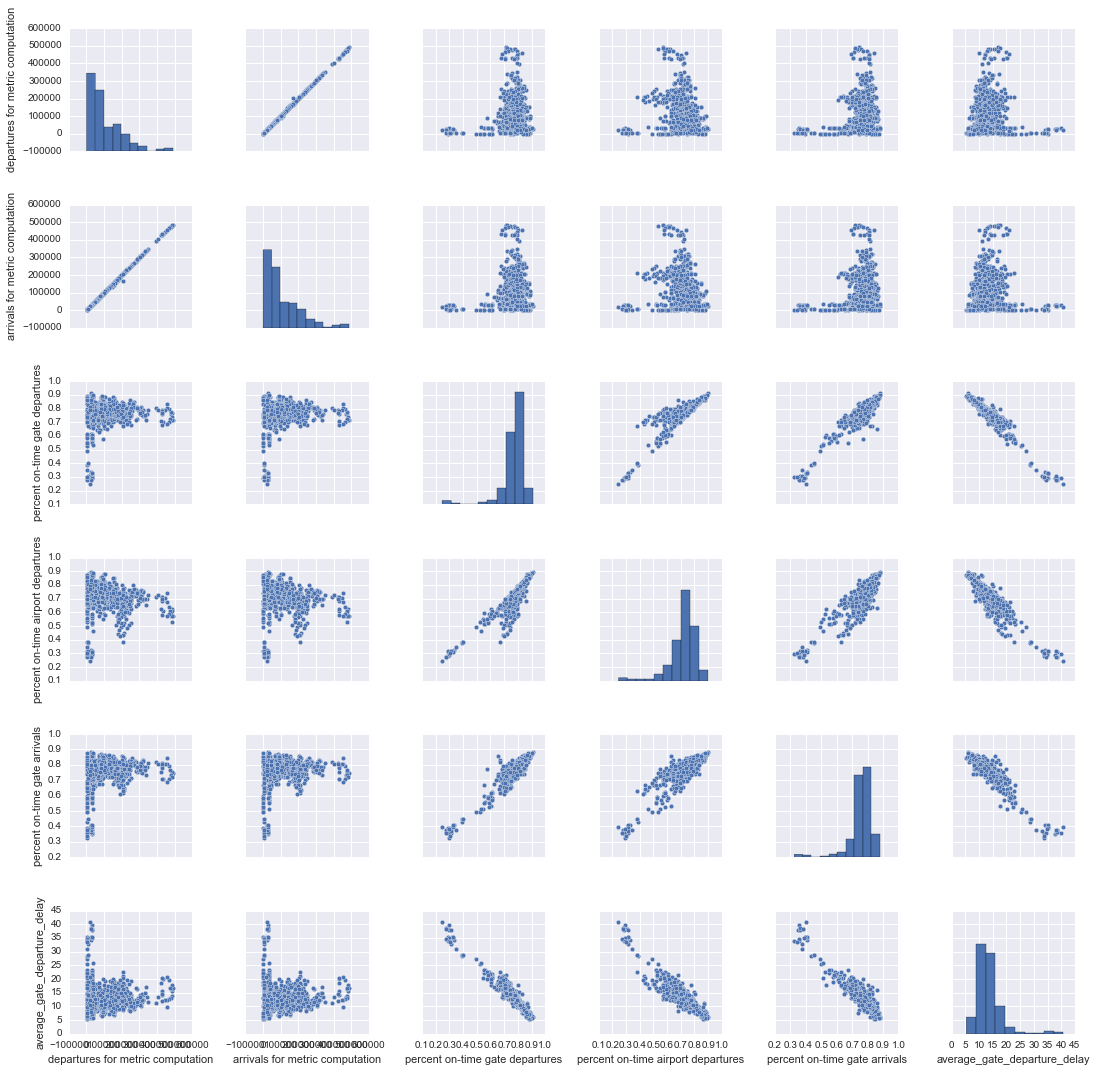

In [161]:
#arrivals are correlated with departures so probably only need one 
#gate seems fairly correlated with the airport (arrivals and departures)
#departures and arrivals are fairly correlated

sns.pairplot(airport_cancel_details[[2,3,4,5,6,7]])

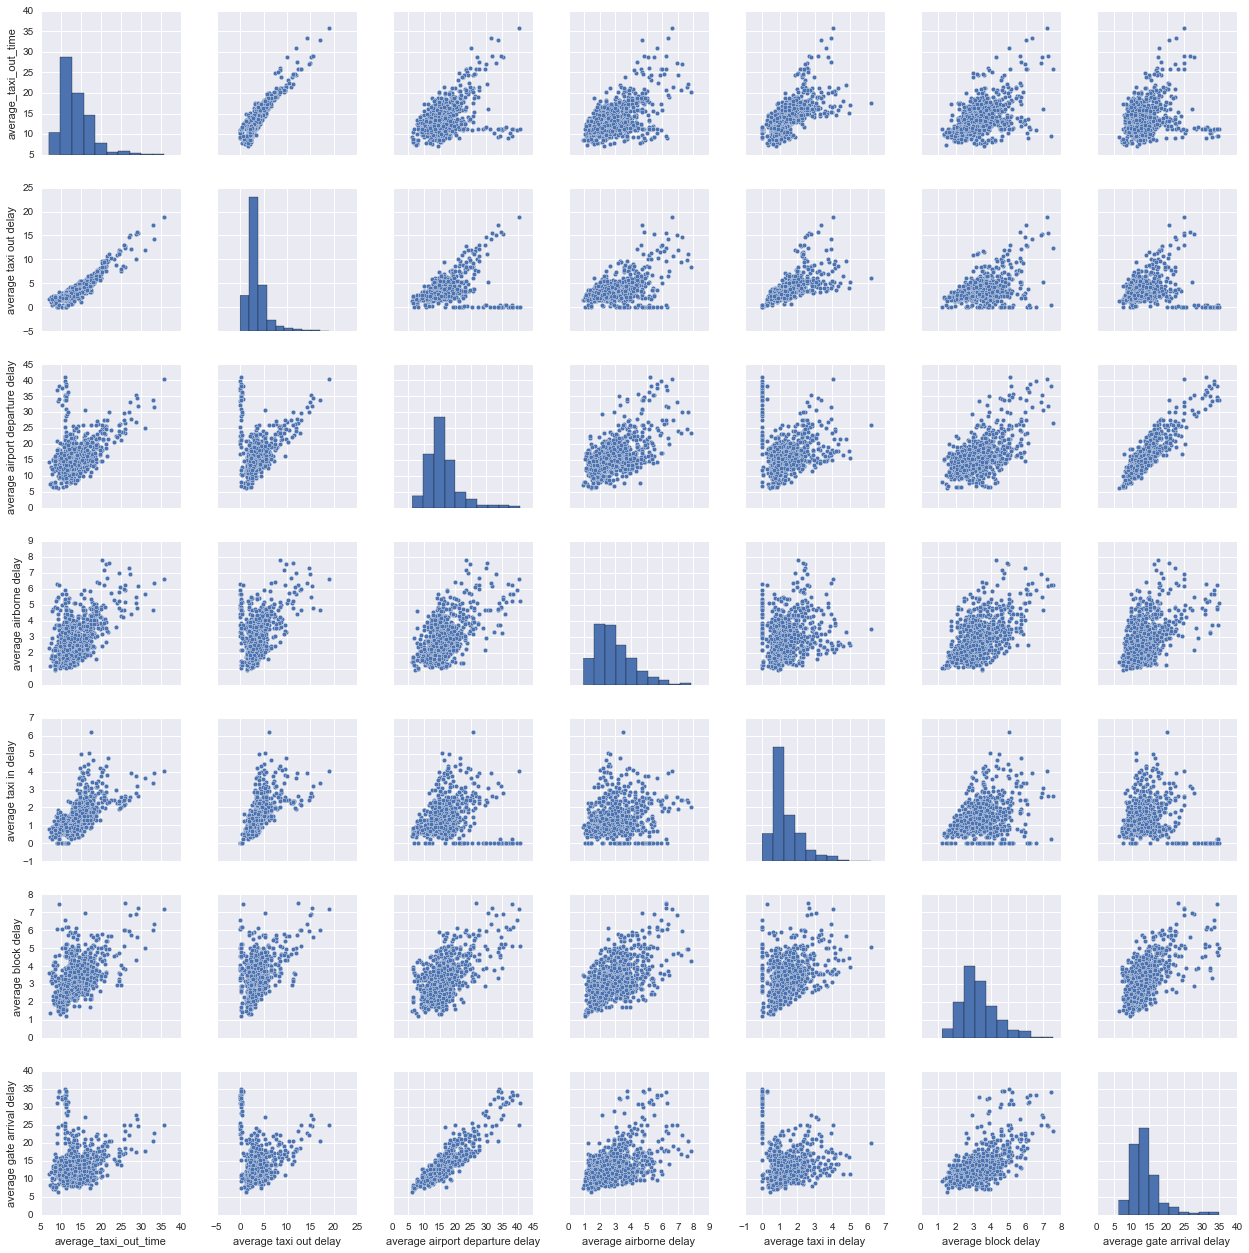

In [163]:
sns.pairplot(airport_cancel_details[[8,9,10,11,12,13,14]])

continue eda by combining the datasets

In [12]:
airport_details.rename(columns = {"LocID": "airport"}, inplace = True)

In [13]:
#begin to concat the data

onegiant = airport_cancel_details.merge(airport_details, how = "left")

In [71]:
onegiant.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


In [15]:
airport_cancel_divert.head()

airport_cancel_divert.rename(columns = {"Airport": "airport", "Year": "year"}, inplace = True)

In [85]:
giant_data = onegiant.merge(airport_cancel_divert, on = ["airport", "year"], how = "left")

In [200]:
#FINAL DATA - will confirm if all merges worked

giant_data[giant_data["airport"] == "TPA"]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
808,TPA,2004,100556,100312,0.8245,0.8023,0.7921,9.85,11.88,2.39,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,1167.0,1016.0,154.0,139.0
809,TPA,2005,111899,111953,0.7996,0.7656,0.7696,11.39,12.17,3.12,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,771.0,746.0,212.0,103.0
810,TPA,2006,106426,106040,0.8129,0.7871,0.7869,10.78,12.13,2.87,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,427.0,356.0,197.0,189.0
811,TPA,2007,107523,107579,0.7903,0.7620,0.7542,12.55,12.03,2.78,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,705.0,655.0,186.0,121.0
812,TPA,2008,100289,100528,0.7983,0.7684,0.7672,12.39,12.19,2.85,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,727.0,654.0,194.0,182.0
813,TPA,2009,83888,84140,0.8154,0.7875,0.7965,10.86,12.05,2.59,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,349.0,307.0,201.0,102.0
814,TPA,2010,82346,82582,0.8121,0.7775,0.7988,11.02,12.45,3.03,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,709.0,655.0,157.0,140.0
815,TPA,2011,81837,81897,0.8296,0.8054,0.8044,10.60,11.93,2.42,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,667.0,622.0,176.0,137.0
816,TPA,2012,80605,80523,0.8322,0.8096,0.8080,10.51,11.69,2.19,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,450.0,411.0,131.0,132.0
817,TPA,2013,80603,79946,0.7997,0.7750,0.7774,11.90,11.86,2.36,...,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes,326.0,301.0,152.0,118.0


In [18]:
airport_cancel_details[airport_cancel_details["airport"] == "TPA"]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
808,TPA,2004,100556,100312,0.8245,0.8023,0.7921,9.85,11.88,2.39,11.53,2.24,0.70,3.10,11.30
809,TPA,2005,111899,111953,0.7996,0.7656,0.7696,11.39,12.17,3.12,13.76,2.58,1.03,3.52,12.84
810,TPA,2006,106426,106040,0.8129,0.7871,0.7869,10.78,12.13,2.87,12.70,2.48,0.93,3.00,11.87
811,TPA,2007,107523,107579,0.7903,0.7620,0.7542,12.55,12.03,2.78,14.49,2.19,0.89,3.51,14.26
812,TPA,2008,100289,100528,0.7983,0.7684,0.7672,12.39,12.19,2.85,14.37,1.30,0.89,3.70,13.76
813,TPA,2009,83888,84140,0.8154,0.7875,0.7965,10.86,12.05,2.59,12.64,1.08,0.74,3.00,11.51
814,TPA,2010,82346,82582,0.8121,0.7775,0.7988,11.02,12.45,3.03,13.21,1.86,0.94,2.68,11.65
815,TPA,2011,81837,81897,0.8296,0.8054,0.8044,10.60,11.93,2.42,12.19,1.66,0.75,2.53,11.51
816,TPA,2012,80605,80523,0.8322,0.8096,0.8080,10.51,11.69,2.19,11.88,1.53,0.85,2.57,11.30
817,TPA,2013,80603,79946,0.7997,0.7750,0.7774,11.90,11.86,2.36,13.39,1.63,0.87,3.00,12.66


In [203]:
airport_cancel_divert[airport_cancel_divert["airport"] == "TPA"]

,airport,year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
783,TPA,2004.0,1167.0,1016.0,154.0,139.0
784,TPA,2005.0,771.0,746.0,212.0,103.0
785,TPA,2006.0,427.0,356.0,197.0,189.0
786,TPA,2007.0,705.0,655.0,186.0,121.0
787,TPA,2008.0,727.0,654.0,194.0,182.0
788,TPA,2009.0,349.0,307.0,201.0,102.0
789,TPA,2010.0,709.0,655.0,157.0,140.0
790,TPA,2011.0,667.0,622.0,176.0,137.0
791,TPA,2012.0,450.0,411.0,131.0,132.0
792,TPA,2013.0,326.0,301.0,152.0,118.0


In [202]:
airport_details[airport_details["airport"] == "TPA"]

,Key,airport,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
103,864.0,TPA,TAMPA INTL,Tampa Int'l Airport,Airport,ASO,HILLSBOROUGH,TAMPA,FL,Federalized/Commercial,27.975472,-82.53325,Yes


In [86]:
giant_data.columns

del giant_data["AP Type"]
del giant_data["Boundary Data Available"]
del giant_data["Key"]
del giant_data["Facility Type"]
del giant_data["AP_NAME"]

In [20]:
#clean up giant_data

giant_data.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'ALIAS',
       u'FAA REGION', u'COUNTY', u'CITY', u'STATE', u'Latitude', u'Longitude',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions'],
      dtype='object')

In [217]:
giant_data.head(1).T

,0
airport,ABQ
year,2004
departures for metric computation,53971
arrivals for metric computation,53818
percent on-time gate departures,0.803
percent on-time airport departures,0.7809
percent on-time gate arrivals,0.7921
average_gate_departure_delay,10.38
average_taxi_out_time,9.89
average taxi out delay,2.43


In [220]:
giant_data["airport"].value_counts()

LAS    11
BUR    11
VNY    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
GYY    11
SAT    11
RDU    11
MEM    11
ISP    11
TEB    11
MHT    11
SJC    11
SWF    11
MKE    11
ONT    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
BDL    11
DFW    11
IAD    11
OXR    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
RFD    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
PSP     8
SMF     8
Name: airport, dtype: int64

In [221]:
giant_data[giant_data["airport"] == "VNY"]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,FAA REGION,COUNTY,CITY,STATE,Latitude,Longitude,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
830,VNY,2004,1331,1301,0.2900,0.3178,0.3920,35.15,9.20,0.00,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
831,VNY,2005,5235,5169,0.2930,0.2835,0.3562,33.75,9.55,0.53,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
832,VNY,2006,6142,6112,0.3097,0.3167,0.3724,32.83,10.33,0.05,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
833,VNY,2007,6179,6349,0.2936,0.2921,0.3853,34.96,11.06,0.09,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
834,VNY,2008,4282,4469,0.2756,0.2723,0.3571,34.45,11.24,0.16,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
835,VNY,2009,2986,3005,0.2971,0.2954,0.3241,33.86,11.15,0.10,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
836,VNY,2010,3420,3500,0.3023,0.3018,0.3394,33.63,11.22,0.15,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
837,VNY,2011,4134,4134,0.3474,0.3454,0.3752,30.96,11.17,0.12,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
838,VNY,2012,4753,4787,0.3909,0.3859,0.4299,28.50,11.20,0.14,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN
839,VNY,2013,6096,6165,0.3924,0.3778,0.4513,28.61,11.48,0.40,...,AWP,LOS ANGELES,VAN NUYS,CA,34.209806,-118.489972,NaN,NaN,NaN,NaN


In [224]:
#note about the data: 
#GYY, TEB, VNY missing things - doesn't seem to have a related geo. will remove data

print airport_details[airport_details["airport"] == "GYY"]
print airport_details[airport_details["airport"] == "TEB"]
print airport_details[airport_details["airport"] == "VNY"]

         Key airport            AP_NAME                 ALIAS Facility Type  \
3108  1256.0     GYY  GARY/CHICAGO INTL  Gary/Chicago Airport       Airport   

     FAA REGION COUNTY  CITY STATE                 AP Type   Latitude  \
3108        AGL   LAKE  GARY    IN  Federalized/Commercial  41.616278   

      Longitude Boundary Data Available  
3108 -87.412778                     Yes  
         Key airport    AP_NAME              ALIAS Facility Type FAA REGION  \
2833  2341.0     TEB  TETERBORO  Teterboro Airport       Airport        AEA   

      COUNTY       CITY STATE     AP Type   Latitude  Longitude  \
2833  BERGEN  TETERBORO    NJ  Public Use  40.850101 -74.060836   

     Boundary Data Available  
2833                     Yes  
        Key airport   AP_NAME             ALIAS Facility Type FAA REGION  \
1022  679.0     VNY  VAN NUYS  Van Nuys Airport       Airport        AWP   

           COUNTY      CITY STATE     AP Type   Latitude   Longitude  \
1022  LOS ANGELES  VAN NUYS  

In [87]:
#"GYY", "TEB", "VNY" remove

giant_data = giant_data[giant_data["airport"] != "GYY"]
giant_data = giant_data[giant_data["airport"] != "TEB"]
giant_data = giant_data[giant_data["airport"] != "VNY"]

In [75]:
len(giant_data["airport"].value_counts())

74

In [233]:
#PSP and SMF will be missing values
giant_data["airport"].value_counts()

LAS    11
STL    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
ONT    11
SAT    11
RDU    11
MEM    11
ISP    11
IAH    11
JAX    11
OAK    11
BUR    11
MHT    11
HNL    11
MKE    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
MSP    11
SWF    11
SAN    11
       ..
SNA    11
SDF    11
DFW    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
BHM    11
PIT    11
OMA    11
MCO    11
IAD    11
OXR    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
RFD    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
SLC    11
JFK    11
PSP     8
SMF     8
Name: airport, dtype: int64

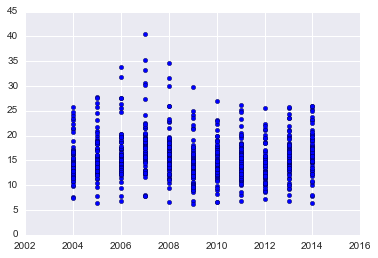

In [237]:
#doesnt look like there's a real correlation with year

plt.scatter(x=giant_data["year"], y = giant_data["average airport departure delay"])

In [254]:
#find the airport with the most delays 

delayed_airports = pd.pivot_table(giant_data, index = ["airport"], values = ["average airport departure delay"],aggfunc=np.mean).sort_values("average airport departure delay", ascending = False)

In [1181]:
delayed_airports.head()

,average airport departure delay
airport,
EWR,27.867273
JFK,27.430909
LGA,25.775455
HPN,24.567273
PHL,23.183636


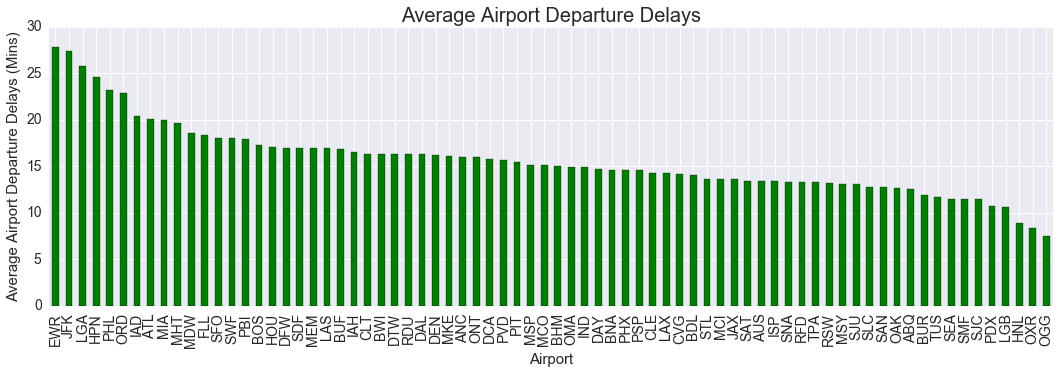

In [1182]:

delayed_airports.plot(kind = "bar", figsize = (18,5), color = "green")

ax = plt.gca()
ax.set_title("Average Airport Departure Delays", size = 20)
ax.set_ylabel("Average Airport Departure Delays (Mins)", size = 15)
ax.set_xlabel("Airport", size=15)
ax.legend_.remove()
plt.show()


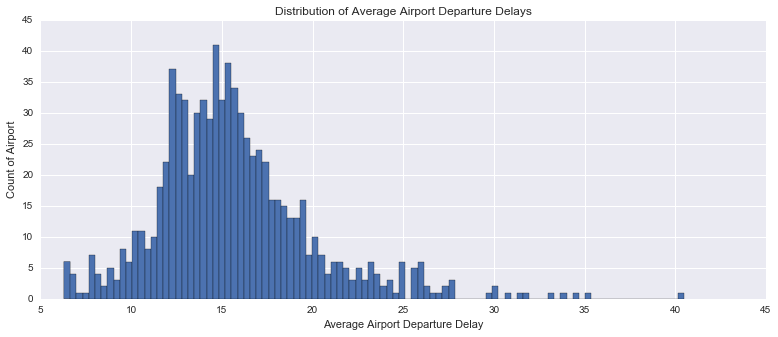

In [265]:
#plot average delays

giant_data["average airport departure delay"].plot(kind = "hist", bins = 100, figsize = (13,5))

ax = plt.gca()
ax.set_title("Distribution of Average Airport Departure Delays")
ax.set_ylabel("Count of Airport")
ax.set_xlabel("Average Airport Departure Delay")

plt.show()

In [274]:
#check delays by FAA REgion

faa_region = pd.pivot_table(giant_data, index = ["FAA REGION"], values = ["average airport departure delay"],aggfunc=np.mean).sort_values("average airport departure delay", ascending = False)

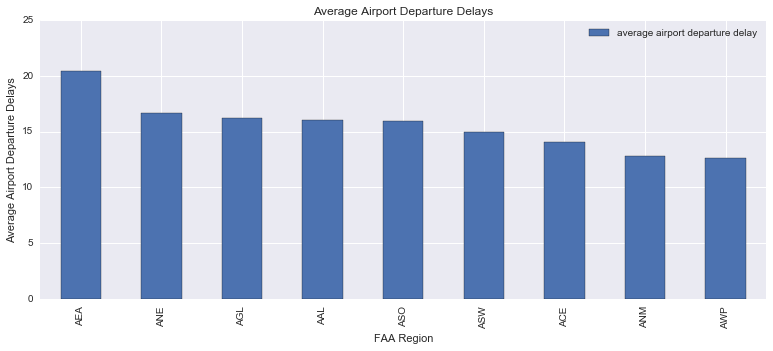

In [275]:
#highest is AEA in northeast

faa_region.plot(kind = "bar", figsize = (13,5))

ax = plt.gca()
ax.set_title("Average Airport Departure Delays")
ax.set_ylabel("Average Airport Departure Delays")
ax.set_xlabel("FAA Region")

plt.show()


In [268]:
giant_data["FAA REGION"].value_counts()

AWP    181
ASO    176
AEA    132
AGL     99
ASW     88
ANM     44
ANE     44
ACE     33
AAL     11
Name: FAA REGION, dtype: int64

In [269]:
giant_data["COUNTY"].value_counts()

ORANGE            33
JEFFERSON         33
LOS ANGELES       33
COOK              22
QUEENS            22
HILLSBOROUGH      22
SUFFOLK           22
HARRIS            22
WINNEBAGO         11
KING              11
MULTNOMAH         11
DALLAS            11
ST LOUIS CITY     11
SAN DIEGO         11
LEE               11
ALAMEDA           11
ESSEX             11
DENVER            11
MONTGOMERY        11
SAN MATEO         11
ANCHORAGE         11
ERIE              11
MARION            11
MARICOPA          11
HONOLULU          11
BOONE             11
HENNEPIN          11
PALM BEACH        11
VENTURA           11
TRAVIS            11
                  ..
PHILADELPHIA      11
FULTON            11
PIMA              11
DAVIDSON          11
SAN BERNARDINO    11
ALLEGHENY         11
KENT              11
CLARK             11
WESTCHESTER       11
BERNALILLO        11
ANNE ARUNDEL      11
SHELBY            11
DADE              11
MECKLENBURG       11
#NAME?            11
TARRANT           11
SALT LAKE    

In [320]:
giant_data[giant_data["COUNTY"] == "#NAME?"]

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,FAA REGION,COUNTY,CITY,STATE,Departure Cancellations,Departure Diversions,Arrival Diversions
734,2004,60371,56735,0.8019,0.7794,0.7984,11.19,13.84,2.27,1.88,0.79,3.39,12.28,ASO,#NAME?,SAN JUAN,PR,330.0,55.0,28.0
735,2005,57736,54870,0.7789,0.7464,0.7604,12.74,14.14,3.03,1.63,1.36,4.04,14.65,ASO,#NAME?,SAN JUAN,PR,315.0,64.0,36.0
736,2006,55707,52948,0.8054,0.7446,0.7611,11.61,15.75,4.28,1.73,1.29,4.19,14.17,ASO,#NAME?,SAN JUAN,PR,257.0,63.0,44.0
737,2007,47987,47246,0.8014,0.7522,0.7414,12.53,15.22,3.16,1.55,1.71,4.09,16.31,ASO,#NAME?,SAN JUAN,PR,307.0,70.0,42.0
738,2008,44493,43448,0.8004,0.7810,0.7533,12.54,14.22,1.85,1.64,1.25,3.75,15.18,ASO,#NAME?,SAN JUAN,PR,238.0,78.0,29.0
739,2009,48418,46678,0.8168,0.8015,0.7999,11.44,13.29,1.43,1.22,0.95,2.88,11.77,ASO,#NAME?,SAN JUAN,PR,199.0,57.0,58.0
740,2010,47314,45781,0.7967,0.7815,0.7719,12.21,13.04,1.39,1.65,1.32,3.53,13.40,ASO,#NAME?,SAN JUAN,PR,258.0,82.0,45.0
741,2011,42803,42401,0.8179,0.7934,0.7899,10.86,13.23,1.96,1.45,1.57,3.67,12.28,ASO,#NAME?,SAN JUAN,PR,240.0,101.0,55.0
742,2012,44716,43985,0.8417,0.8228,0.8181,9.55,13.15,1.82,1.41,1.33,2.89,10.64,ASO,#NAME?,SAN JUAN,PR,174.0,62.0,41.0
743,2013,42902,42175,0.8058,0.7808,0.7840,12.31,13.56,2.20,1.78,1.41,2.86,12.96,ASO,#NAME?,SAN JUAN,PR,127.0,65.0,64.0


In [88]:
giant_data["COUNTY"] = giant_data["COUNTY"].apply(lambda x: "PR" if x == "#NAME?" else x)

In [271]:
giant_data["CITY"].value_counts()

NEW YORK             33
HOUSTON              22
WASHINGTON           22
CHICAGO              22
CHICAGO/ROCKFORD     11
ONTARIO              11
KAHULUI              11
DALLAS               11
SAN DIEGO            11
PHILADELPHIA         11
DENVER               11
NEWARK               11
PROVIDENCE           11
FORT MYERS           11
LAS VEGAS            11
DALLAS-FORT WORTH    11
LOS ANGELES          11
FORT LAUDERDALE      11
BALTIMORE            11
ATLANTA              11
JACKSONVILLE         11
WINDSOR LOCKS        11
SANTA ANA            11
HONOLULU             11
SAN JUAN             11
BIRMINGHAM           11
COVINGTON            11
WHITE PLAINS         11
WEST PALM BEACH      11
DETROIT              11
                     ..
OAKLAND              11
MANCHESTER           11
CLEVELAND            11
NEW ORLEANS          11
TUCSON               11
ALBUQUERQUE          11
NASHVILLE            11
PHOENIX              11
CHARLOTTE            11
SALT LAKE CITY       11
BUFFALO         

In [272]:
giant_data["STATE"].value_counts()

CA    126
FL     77
NY     66
TX     66
IL     33
PA     22
TN     22
KY     22
NC     22
AZ     22
OH     22
HI     22
MO     22
DC     22
NJ     11
NM     11
NH     11
LA     11
NE     11
WI     11
OR     11
NV     11
PR     11
RI     11
CO     11
AK     11
AL     11
GA     11
IN     11
CT     11
MD     11
MA     11
UT     11
MN     11
MI     11
WA     11
Name: STATE, dtype: int64

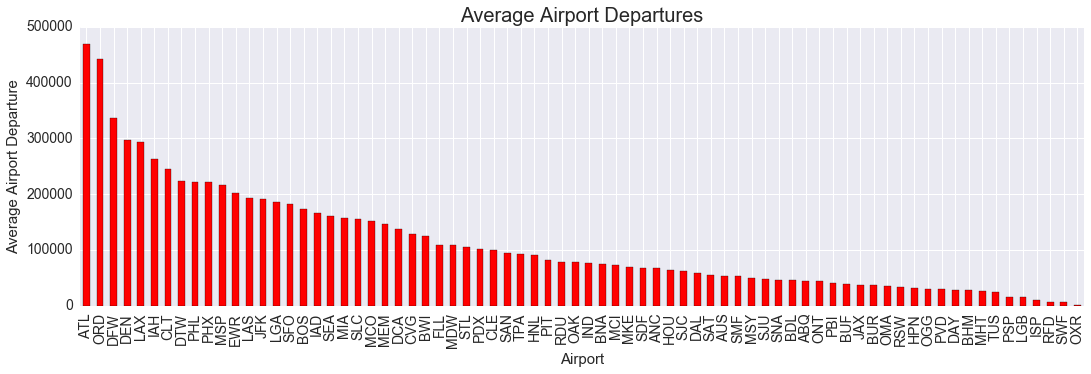

In [1185]:
congested_airports = pd.pivot_table(giant_data, index = ["airport"], values = ["departures for metric computation"],aggfunc=np.mean).sort_values("departures for metric computation", ascending = False)

congested_airports.plot(kind = "bar", figsize = (18,5), color = "red")

ax = plt.gca()
ax.set_title("Average Airport Departures", size = 20)
ax.set_ylabel("Average Airport Departure", size = 15)
ax.set_xlabel("Airport", size=15)
ax.legend_.remove()
plt.show()


### Begin Clustering

In [89]:
#delete "Arrival Cancellations" since it was basically one to one correlated to departure cancellations

del giant_data["Arrival Cancellations"]

giant_data.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'ALIAS',
       u'FAA REGION', u'COUNTY', u'CITY', u'STATE', u'Latitude', u'Longitude',
       u'Departure Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [342]:
#begin to create dummies and form X and Y

giant_data.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
ALIAS                                  object
FAA REGION                             object
COUNTY                                 object
CITY                                   object
STATE                                  object
Latitude                              float64
Longitude                         

In [90]:
#not going to use these locations becuase its basically duplicative of the other geos

del giant_data["Latitude"]
del giant_data["Longitude"]
del giant_data["ALIAS"]

In [91]:
#remove all NAs

giant_data = giant_data.dropna()

In [92]:
giant_data.isnull().sum().sum()

0

In [82]:
#use X as the variable hold all the variables that seem the same

X_delay = giant_data

In [83]:
del X_delay["airport"]
del X_delay["year"]
del X_delay["FAA REGION"]
del X_delay["COUNTY"]
del X_delay["CITY"]
del X_delay["STATE"]
del X_delay["departures for metric computation"]
del X_delay["arrivals for metric computation"]

In [58]:
#standardized all data
from sklearn.preprocessing import StandardScaler

X_stand = StandardScaler().fit_transform(X_delay)

Try PCA

In [59]:
#implement PCA

covmat = np.cov(X_stand.T)
eigenValues, eigenVectors = np.linalg.eig(covmat)

In [60]:
print eigenValues

[  7.64282127e+00   3.14683883e+00   1.11133561e+00   6.38128341e-01
   4.54983632e-01   3.10642528e-01   1.80382664e-01   1.70927390e-01
   5.99795376e-02   1.50773012e-02   9.60075062e-04   4.84278797e-03
   1.42690530e-01   1.37933368e-01]


In [61]:
len(eigenValues)

14

In [62]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

#first 3 look good

7.64282126918
3.14683882689
1.11133560845
0.638128341489
0.454983632238
0.310642527827
0.180382663658
0.170927389669
0.142690530205
0.137933368216
0.0599795375673
0.0150773012332
0.0048427879733
0.000960075061511


In [63]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [64]:
#confirms that first 3 explain the most

cvarex = np.cumsum(varExpl)
print cvarex

[  54.52325561   76.97254386   84.9007203    89.45307517   92.69889082
   94.91498895   96.20182398   97.42120586   98.43914831   99.42315357
   99.85104263   99.95860285   99.9931509   100.        ]


In [65]:
#convert to list in order to visualize it

cvarex_list = cvarex.tolist()

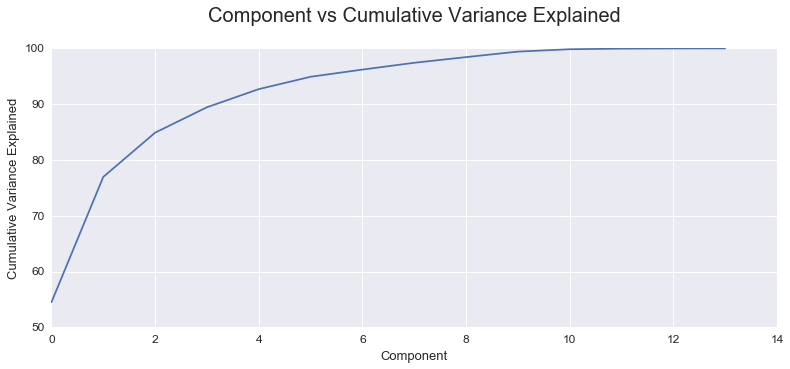

In [1040]:
plt.figure(figsize=(13,5))
ax = plt.gca()
ax.set_ylabel('Cumulative Variance Explained', fontsize=13)
ax.set_xlabel('Component', fontsize=13)
ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
plt.plot(cvarex_list)

In [67]:
#implement the 3 pca labels as future features

from sklearn.decomposition import PCA

airports_pca = PCA(n_components=3)
airports_pca.fit(X_stand)
X_PCA = airports_pca.transform(X_stand)

In [68]:
#print into a new dataframe

X_df_PCA = pd.DataFrame(X_PCA, columns=['PC1','PC2','PC3'])

In [612]:
#test it out to see what happened

X_df_PCA.head()

,PC1,PC2,PC3
0,-2.487385,0.076278,0.036366
1,-2.949253,-0.194709,0.017531
2,-2.189543,0.279556,-0.324838
3,-1.688051,0.323438,-0.181177
4,-2.355107,0.061881,-0.188308


In [96]:
#concactenate it to the giant_data to take a look at the airports

X_df_PCA = pd.concat([X_df_PCA, giant_data["airport"]], axis = 1)

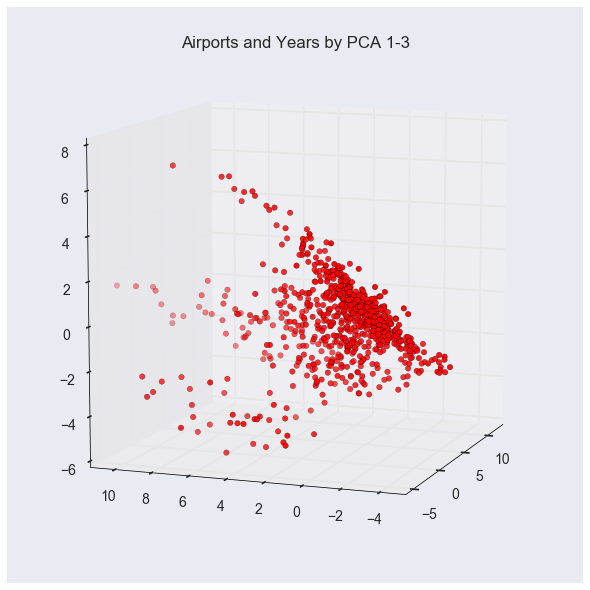

In [615]:
#plot the shape of the pca

from mpl_toolkits.mplot3d import Axes3D
x = X_df_PCA["PC1"]
y= X_df_PCA["PC2"]
z=X_df_PCA["PC3"]


fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, elev=10, azim=200)
ax.scatter(x, y, z, zdir="x", c="red", s=30)
ax.set_xlim3d(-6, 13)
ax.set_ylim3d(-5,11)
ax.set_zlim3d(-6,8)
plt.title("Airports and Years by PCA 1-3")
plt.show()

In [749]:
#concatenate to see if which features are most explained by each PCA

X_delay_pca = pd.concat([X_delay, X_df_PCA], axis =1)

In [760]:
X_delay_pca.columns[:13]

Index([u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Departure Diversions'],
      dtype='object')

In [997]:
pca_corr = X_delay_pca.corr().iloc[-3:].T

In [1005]:
pca_corr = pca_corr[:-3]

In [1015]:
pca_corr_test.sort_values("PC1", ascending = False, inplace = True)

In [1013]:
pca_corr.sort_values("PC1")

,PC1,PC2,PC3
percent on-time airport departures,-0.303690,0.088339,0.008673
percent on-time gate departures,-0.261661,-0.069826,0.109107
percent on-time gate arrivals,-0.194523,-0.102029,-0.096919
average airborne delay,0.102865,-0.105216,0.272514
average_taxi_out_time,0.176739,-0.274934,0.118915
Departure Cancellations,0.193310,-0.313454,-0.066912
average block delay,0.194416,-0.070173,0.200832
average gate arrival delay,0.213067,0.044427,0.099373
average taxi out delay,0.220842,-0.236109,0.113830
Departure Diversions,0.240057,-0.391886,-0.118668


In [1016]:
pca_corr_test

,PC1,PC2,PC3
average airport departure delay,0.304595,0.084623,0.011553
percent on-time airport departures,0.303690,0.088339,0.008673
average taxi in delay,0.279576,0.303689,0.103068
average_gate_departure_delay,0.273582,0.046101,0.088581
percent on-time gate departures,0.261661,0.069826,0.109107
Arrival Diversions,0.251754,0.344873,0.223502
Departure Diversions,0.240057,0.391886,0.118668
average taxi out delay,0.220842,0.236109,0.113830
average gate arrival delay,0.213067,0.044427,0.099373
percent on-time gate arrivals,0.194523,0.102029,0.096919


In [1]:

plt.figure(figsize=(12,10))
#sns.set(font_scale=1.5)
ax = sns.heatmap(pca_corr_test, cmap = "YlGnBu")

ax.axes.set_title("Correlation of Airport 'Delay' Features (abs value)", size = 20)

plt.show()

#Focus on PC1, PC2, PC3 see theres not huge correlations for specific features - pretty much the same throughout. 


NameError: name 'plt' is not defined

Try clustering on the new PCA - Kmeans works the best

In [107]:
from sklearn import cluster, metrics


k = [2,3,4]
for i in k:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_stand)
    labels = kmeans.labels_
    print i, silhouette_score(X_stand, labels)
    
#2 clusters performs best at slightly higher rates than hierarchical

2 0.447550752531
3 0.257681183082
4 0.270178770991


In [108]:
#set kmeans so that its the 2 best performing clusters

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X_stand)
labels_k = kmeans.labels_
print silhouette_score(X_stand, labels_k)

0.447550752531


In [109]:
#attach these to the dataframe

k_2_s = pd.Series(labels_k)
X_k_2 = pd.concat([X_df_PCA, k_2_s], axis = 1)

In [868]:
#theres significantly more labels than the others 

X_k_2[0].value_counts()

0    649
1    150
Name: 0, dtype: int64

In [871]:
X_k_2.iloc[649:]

,PC1,PC2,PC3,airport,0
649,2.182609,-0.440757,-0.476979,LAS,1
650,1.752566,-0.655372,-0.629469,LAS,1
651,2.012033,-0.180637,-0.554120,LAS,1
652,4.794052,-0.433332,2.977272,PHL,1
653,2.125726,1.150666,-0.180040,MDW,1
654,2.297813,1.237333,-0.275514,MDW,1
655,2.681096,-0.787302,2.284748,PHL,1
656,4.947733,-0.257963,1.343450,JFK,1
657,4.482944,-0.240511,1.520169,JFK,1
658,2.868907,-0.895832,1.563713,JFK,1


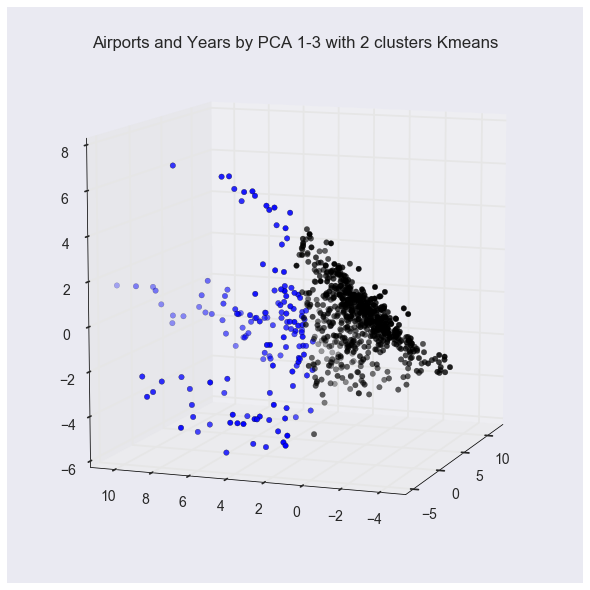

In [872]:
#plot the PCA with the 2 new clusters

x1 = X_k_2.iloc[:649].PC1
y1 = X_k_2.iloc[:649].PC2
z1 = X_k_2.iloc[:649].PC3

x2 = X_k_2.iloc[649:].PC1
y2 = X_k_2.iloc[649:].PC2
z2 = X_k_2.iloc[649:].PC3


fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, elev=10, azim=200)
ax.scatter(x1, y1, z1, zdir="x", c="black", s=30)
ax.scatter(x2, y2, z2, zdir="x", c="blue", s=30)
ax.set_xlim3d(-6, 13)
ax.set_ylim3d(-5,11)
ax.set_zlim3d(-6,8)
plt.title("Airports & Years by PCA 1-3 with 2 Clusters Kmeans")
plt.show()
#FINAL ANALYSIS

### Run predictive models to see if we can predict delays

In [873]:
#first begin to concatenate data

giant_data.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,average taxi in delay,average block delay,average gate arrival delay,FAA REGION,COUNTY,CITY,STATE,Departure Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,...,0.83,2.55,10.87,ASW,BERNALILLO,ALBUQUERQUE,NM,242.0,71.0,46.0
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,...,0.89,2.34,10.24,ASW,BERNALILLO,ALBUQUERQUE,NM,221.0,61.0,33.0
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,...,0.84,2.66,11.82,ASW,BERNALILLO,ALBUQUERQUE,NM,392.0,71.0,124.0
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,...,1.29,3.06,12.71,ASW,BERNALILLO,ALBUQUERQUE,NM,366.0,107.0,45.0
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,...,1.03,2.79,11.48,ASW,BERNALILLO,ALBUQUERQUE,NM,333.0,79.0,42.0


In [874]:
X.head()

,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Departure Diversions,Arrival Diversions
0,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,242.0,71.0,46.0
1,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,221.0,61.0,33.0
2,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,392.0,71.0,124.0
3,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,366.0,107.0,45.0
4,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,333.0,79.0,42.0


In [910]:
not_y = giant_data

In [880]:
X.columns

Index([u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [905]:
not_y.tail()

,airport,year,departures for metric computation,arrivals for metric computation,FAA REGION,COUNTY,CITY,STATE
794,TUS,2010,24995,25088,AWP,PIMA,TUCSON,AZ
795,TUS,2011,25149,25165,AWP,PIMA,TUCSON,AZ
796,TUS,2012,23583,23679,AWP,PIMA,TUCSON,AZ
797,TUS,2013,22502,22090,AWP,PIMA,TUCSON,AZ
798,TUS,2014,22589,22340,AWP,PIMA,TUCSON,AZ


In [897]:
X_k_3 = pd.concat([X_df_PCA, k_2_s], axis = 1)

In [911]:
not_y = pd.concat([not_y, X_k_3[0]], axis = 1)

In [891]:
#make sure everything concated correctly

In [912]:
not_y.tail()

,airport,year,departures for metric computation,arrivals for metric computation,FAA REGION,COUNTY,CITY,STATE,0
794,TUS,2010,24995,25088,AWP,PIMA,TUCSON,AZ,0
795,TUS,2011,25149,25165,AWP,PIMA,TUCSON,AZ,0
796,TUS,2012,23583,23679,AWP,PIMA,TUCSON,AZ,0
797,TUS,2013,22502,22090,AWP,PIMA,TUCSON,AZ,0
798,TUS,2014,22589,22340,AWP,PIMA,TUCSON,AZ,0


In [913]:
not_y.sort_values(0)

,airport,year,departures for metric computation,arrivals for metric computation,FAA REGION,COUNTY,CITY,STATE,0
0,ABQ,2004,53971,53818,ASW,BERNALILLO,ALBUQUERQUE,NM,0
509,OMA,2007,41352,41570,ACE,DOUGLAS,OMAHA,NE,0
510,OMA,2008,39881,39850,ACE,DOUGLAS,OMAHA,NE,0
511,OMA,2009,36834,36758,ACE,DOUGLAS,OMAHA,NE,0
512,OMA,2010,38331,38386,ACE,DOUGLAS,OMAHA,NE,0
513,OMA,2011,37305,37502,ACE,DOUGLAS,OMAHA,NE,0
514,OMA,2012,35067,35288,ACE,DOUGLAS,OMAHA,NE,0
515,OMA,2013,33253,33594,ACE,DOUGLAS,OMAHA,NE,0
516,OMA,2014,33241,33237,ACE,DOUGLAS,OMAHA,NE,0
517,ONT,2004,54166,54076,AWP,SAN BERNARDINO,ONTARIO,CA,0


In [916]:
not_y.head(1)

,airport,year,departures for metric computation,arrivals for metric computation,FAA REGION,COUNTY,CITY,STATE,0
0,ABQ,2004,53971,53818,ASW,BERNALILLO,ALBUQUERQUE,NM,0


In [922]:
not_y.rename(columns = {0: "label"}, inplace = True)

In [929]:
not_y.sort_values("label", inplace = True)
not_y.reset_index(inplace = True)

not_y.head()

,index,airport,year,departures for metric computation,arrivals for metric computation,FAA REGION,COUNTY,CITY,STATE,label
0,0,ABQ,2004,53971,53818,ASW,BERNALILLO,ALBUQUERQUE,NM,0
1,187,DEN,2004,278131,273449,ANM,DENVER,DENVER,CO,0
2,178,DCA,2006,137261,137325,AEA,ARLINGTON,WASHINGTON,DC,0
3,188,DEN,2005,279946,275578,ANM,DENVER,DENVER,CO,0
4,193,DEN,2010,313514,313279,ANM,DENVER,DENVER,CO,0


In [930]:
del not_y["index"]
not_y["label"].value_counts()

0    649
1    150
Name: label, dtype: int64

In [948]:
del not_y["arrivals for metric computation"]

#its one to one with departures so we only need one

In [945]:
not_y["COUNTY"].unique()

array([u'BERNALILLO', u'DENVER', u'ARLINGTON', u'LOS ANGELES', u'WAYNE',
       u'MONTGOMERY', u'DALLAS', u'ANNE ARUNDEL', u'CUYAHOGA', u'BOONE',
       u'TRAVIS', u'HARTFORD', u'KING', u'SAN MATEO', u'JEFFERSON',
       u'BEXAR', u'SAN DIEGO', u'LEE', u'MECKLENBURG', u'ORANGE',
       u'FULTON', u'ANCHORAGE', u'HONOLULU', u'SUFFOLK', u'CLARK',
       u'LOUDOUN', u'MARION', u'HARRIS', u'BROWARD', u'DUVAL', u'ERIE',
       u'KENT', u'DAVIDSON', u'PIMA', u'WAKE', u'COOK', u'SHELBY',
       u'PALM BEACH', u'MULTNOMAH', u'ALLEGHENY', u'HENNEPIN',
       u'MILWAUKEE', u'HILLSBOROUGH', u'PLATTE', u'VENTURA', u'DOUGLAS',
       u'MAUI', u'ALAMEDA', u'SAN BERNARDINO', u'PHILADELPHIA',
       u'MARICOPA', u'ST LOUIS CITY', u'SANTA CLARA', u'RIVERSIDE',
       u'WINNEBAGO', u'DADE', u'SALT LAKE', u'SACRAMENTO', 'PR',
       u'WESTCHESTER', u'ESSEX', u'TARRANT', u'QUEENS'], dtype=object)

In [949]:
#try tree classification with county only and departures as continuous

#convert to dummies
county_dum = pd.get_dummies(not_y["COUNTY"])
state_dum = pd.get_dummies(not_y["STATE"])
faa_dum = pd.get_dummies(not_y["FAA REGION"])

#concatenate all the x values
not_x_ct = pd.concat([not_y, county_dum, state_dum, faa_dum], axis = 1)

In [961]:
boops = -1
for i in not_x_ct.columns:
    boops += 1
    print i, boops

airport 0
year 1
departures for metric computation 2
FAA REGION 3
COUNTY 4
CITY 5
STATE 6
label 7
ALAMEDA 8
ALLEGHENY 9
ANCHORAGE 10
ANNE ARUNDEL 11
ARLINGTON 12
BERNALILLO 13
BEXAR 14
BOONE 15
BROWARD 16
CLARK 17
COOK 18
CUYAHOGA 19
DADE 20
DALLAS 21
DAVIDSON 22
DENVER 23
DOUGLAS 24
DUVAL 25
ERIE 26
ESSEX 27
FULTON 28
HARRIS 29
HARTFORD 30
HENNEPIN 31
HILLSBOROUGH 32
HONOLULU 33
JEFFERSON 34
KENT 35
KING 36
LEE 37
LOS ANGELES 38
LOUDOUN 39
MARICOPA 40
MARION 41
MAUI 42
MECKLENBURG 43
MILWAUKEE 44
MONTGOMERY 45
MULTNOMAH 46
ORANGE 47
PALM BEACH 48
PHILADELPHIA 49
PIMA 50
PLATTE 51
PR 52
QUEENS 53
RIVERSIDE 54
SACRAMENTO 55
SALT LAKE 56
SAN BERNARDINO 57
SAN DIEGO 58
SAN MATEO 59
SANTA CLARA 60
SHELBY 61
ST LOUIS CITY 62
SUFFOLK 63
TARRANT 64
TRAVIS 65
VENTURA 66
WAKE 67
WAYNE 68
WESTCHESTER 69
WINNEBAGO 70
AK 71
AL 72
AZ 73
CA 74
CO 75
CT 76
DC 77
FL 78
GA 79
HI 80
IL 81
IN 82
KY 83
LA 84
MA 85
MD 86
MI 87
MN 88
MO 89
NC 90
NE 91
NH 92
NJ 93
NM 94
NV 95
NY 96
OH 97
OR 98
PA 99
PR 100
R

In [956]:
yy = not_x_ct["label"]

In [971]:
#create separate X's to see which geo is able to predict the best

X_FAA = not_x_ct[[1,2,107,108,109,110,111,112,113,114,115]]
X_state = not_x_ct[[1,2,71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]]
X_county = not_x_ct[[1,2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]]

In [972]:
#test train split amongst them all

X_train_faa, X_test_faa, y_train_faa, y_test_faa = train_test_split(X_FAA, yy, test_size = .33)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_state, yy, test_size = .33)
X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X_county, yy, test_size = .33)

In [976]:
#fit random forest - looks like FAA Region is the best

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_faa, y_train_faa)
rf_predict = rf_model.predict(X_test_faa)
print "faa Mean 5 fold cv: ", cross_val_score(rf, X_test_faa, y_test_faa, cv = 5).mean()

rf_model = rf.fit(X_train_st, y_train_st)
rf_predict = rf_model.predict(X_test_st)
print "st Mean 5 fold cv: ", cross_val_score(rf, X_test_st, y_test_st, cv = 5).mean()

rf_model = rf.fit(X_train_ct, y_train_ct)
rf_predict = rf_model.predict(X_test_ct)
print "ct Mean 5 fold cv: ", cross_val_score(rf, X_test_ct, y_test_ct, cv = 5).mean()

faa Mean 5 fold cv:  0.916822555502
st Mean 5 fold cv:  0.871044992743
ct Mean 5 fold cv:  0.878737300435


In [982]:
#final best model 

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_faa, y_train_faa)
rf_predict = rf_model.predict(X_test_faa)
print "faa Mean 5 fold cv: ", cross_val_score(rf, X_test_faa, y_test_faa, cv = 5).mean()

faa Mean 5 fold cv:  0.901867978283


In [984]:
#check feature importances

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_FAA.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.731149)
2. feature 0 (0.115978)
3. feature 4 (0.070275)
4. feature 10 (0.019360)
5. feature 5 (0.018038)
6. feature 7 (0.015317)
7. feature 8 (0.010389)
8. feature 9 (0.008223)
9. feature 2 (0.004880)
10. feature 6 (0.003399)
11. feature 3 (0.002991)


In [985]:
X_FAA.columns

Index([u'year', u'departures for metric computation', u'AAL', u'ACE', u'AEA',
       u'AGL', u'ANE', u'ANM', u'ASO', u'ASW', u'AWP'],
      dtype='object')

The total departures, Year, and AEA region seem to be the biggest driving features of predicting a delay

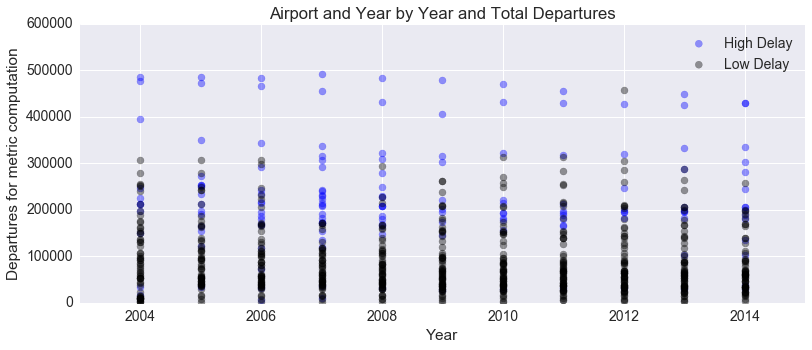

In [1127]:
#doesn't seem to be strong correlation between year and delays

plt.figure(figsize=(13,5))
plt.title("Airport and Year by Year and Total Departures")
plt.ylabel("Departures for metric computation")
plt.xlabel("Year")
plt.ylim(0, 600000)
plt.xlim(2003, 2015)

plt.scatter(x = label_1["year"], y = label_1["departures for metric computation"], color="blue", s = 50, alpha = .4, label = "High Delay")
plt.scatter(x = label_0["year"], y = label_0["departures for metric computation"], color="black", alpha=.4, s = 50, label = "Low Delay")
plt.legend()
plt.show()


In [1083]:
#take a deep dive in FAA and see how that distribution shakes out

faa = label_1["FAA REGION"].value_counts()

In [1089]:
faa.sort_index

<bound method Series.sort_index of AEA    63
ASO    23
AGL    21
ASW    18
AWP    14
ANM     5
ANE     5
AAL     1
Name: FAA REGION, dtype: int64>

In [1088]:
faa_0.sort_index

<bound method Series.sort_index of AWP    163
ASO    153
AGL     73
ASW     70
AEA     69
ANM     39
ANE     39
ACE     33
AAL     10
Name: FAA REGION, dtype: int64>

In [1093]:
faa_0 = label_0["FAA REGION"].value_counts()

merged_faa = pd.concat([faa, faa_0], join = "outer", axis = 1)

In [1094]:
merged_faa

,FAA REGION,FAA REGION
AAL,1.0,10
ACE,NaN,33
AEA,63.0,69
AGL,21.0,73
ANE,5.0,39
ANM,5.0,39
ASO,23.0,153
ASW,18.0,70
AWP,14.0,163


In [1099]:
merged_faa.fillna(value = 0, inplace = True)

In [1102]:
merged_faa.columns = ["label1", "label2"]

In [1119]:
merged_faa.sort_values("label1", inplace = True)

In [1120]:
merged_faa

,label1,label2
ACE,0.0,33
AAL,1.0,10
ANE,5.0,39
ANM,5.0,39
AWP,14.0,163
ASW,18.0,70
AGL,21.0,73
ASO,23.0,153
AEA,63.0,69


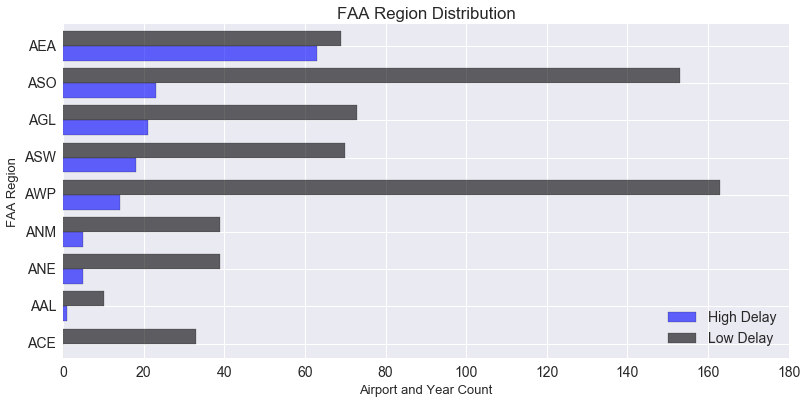

In [1158]:
#AEA is very overrepresented for High Delays

n_groups = 9

index = np.arange(n_groups)
bar_width = .4
plt.figure(figsize=(13,6))
opacity = .6
rects1 = plt.barh(index, merged_faa["label1"], bar_width, alpha=opacity, color='blue', label='High Delay')
rects2 = plt.barh(index + bar_width, merged_faa["label2"], bar_width, alpha=opacity, color='black', label='Low Delay')
plt.ylabel('FAA Region', size = 13)
plt.xlabel('Airport and Year Count', size = 13)
plt.title('FAA Region Distribution')
plt.yticks(index + bar_width, ('ACE', 'AAL', 'ANE', 'ANM', 'AWP', "ASW", "AGL", "ASO", "AEA"))
plt.legend(loc = 4)
plt.show()

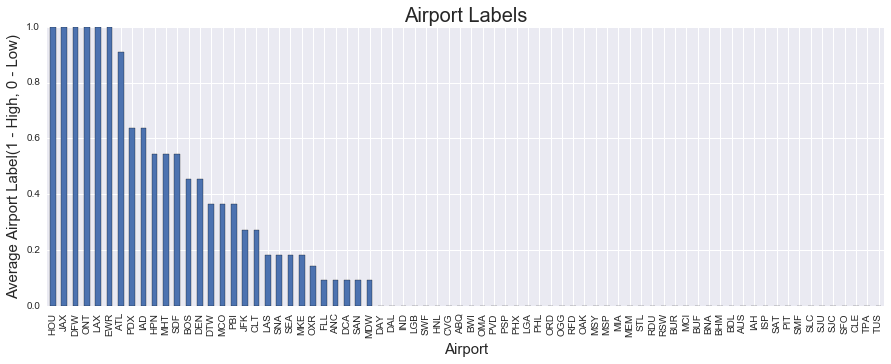

In [126]:
#take a look at which airports on average were labelled under which label

airport_label.sort_values(0, ascending = False, inplace = True)
airport_label.plot(kind = "bar", figsize = (15,5))

ax = plt.gca()
ax.set_title("Airport Labels", size = 20)
ax.set_ylabel("Average Airport Label(1 - High, 0 - Low)", size = 15)
ax.set_xlabel("Airport", size=15)
ax.legend_.remove()
plt.show()


In [132]:
#use EWR as a deep dive

ewr = giant_data[giant_data["airport"] == "EWR"]

In [133]:
ewr.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'Departure Cancellations',
       u'Departure Diversions', u'Arrival Diversions'],
      dtype='object')

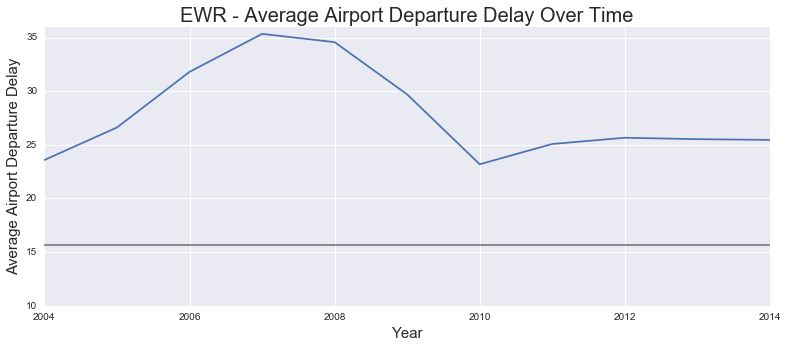

In [159]:
plt.figure(figsize=(13,5))
plt.axhline(y=15.7, xmin=0, xmax=1, hold=None, color = "grey")

plt.plot(ewr["year"], ewr["average airport departure delay"])
plt.title("EWR - Average Airport Departure Delay Over Time", size = 20)
plt.ylabel("Average Airport Departure Delay", size = 15)
plt.xlabel("Year", size=15)
plt.ylim(10,36)


plt.show()


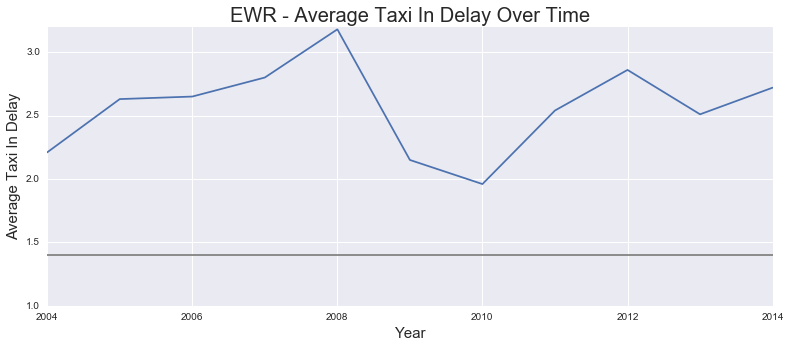

In [156]:
plt.figure(figsize=(13,5))
plt.axhline(y=1.4, xmin=0, xmax=1, hold=None, color = "grey")
plt.plot(ewr["year"], ewr["average taxi in delay"])
plt.title("EWR - Average Taxi In Delay Over Time", size = 20)
plt.ylabel("Average Taxi In Delay", size = 15)
plt.xlabel("Year", size=15)
plt.ylim(1,3.2)

plt.show()

In [152]:
print np.mean(giant_data["average taxi in delay"])
print np.mean(giant_data["average airport departure delay"])

1.41415519399
15.7035043805
